# CLASSIFICATION METHODS

# 1) K-NEAREST NEIGHBORS (KNN)

<b>The closest K neighbors of a point are taken among the labeled data we know before. Among these k neighbors, the point from which class the most points are to be estimated is from that class.</b>

<b>Let it be shown with K points closest to the newly added point. The probability of the point belonging to class j is shown with the following mathematical expression.</b>

# $P\left ( Y=j|X=x_{0} \right )=\frac{1}{K}\sum _{i\in N_{0}}I\left ( y_{i}=j \right )$

<b>Before starting to develop a prediction model using the iris dataset, we can examine the relationships between the independent variables. The pairplot() method in the Seaborn module helps us to see the relationships between the variables in pairs.</b>

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data,columns=iris.feature_names)
irisdf.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

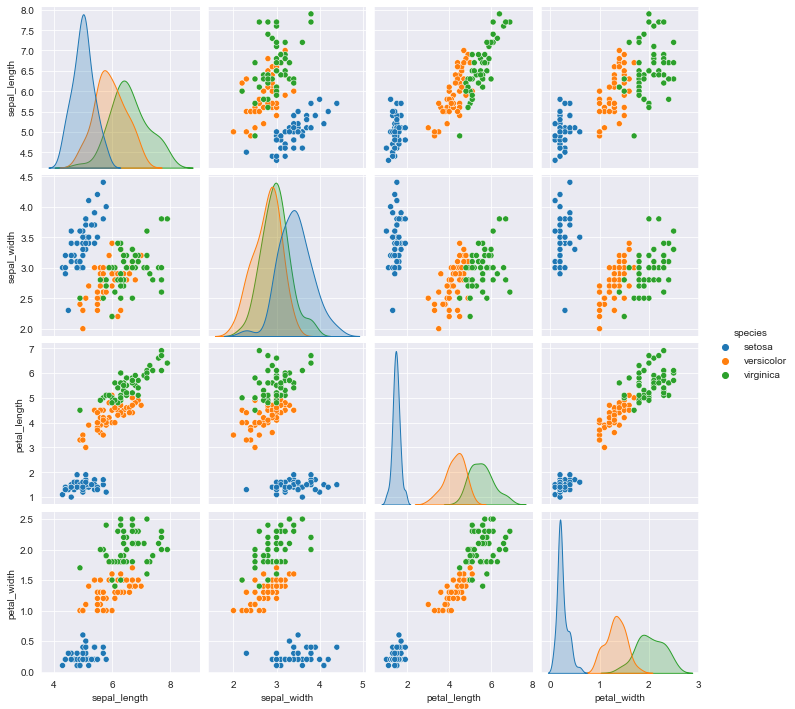

In [2]:
iris = sns.load_dataset('iris')
sns.pairplot(iris,hue='species')
plt.show()

<b>When we examine the graphs, we see that some of the flowers of different species are clustered in different regions. For example, there is a clear distinction in the Petal Width-Petal Length or Petal Length-Sepal Length graphs. Let's look at the Petal Length-Petal Width graph in more detail.</b>

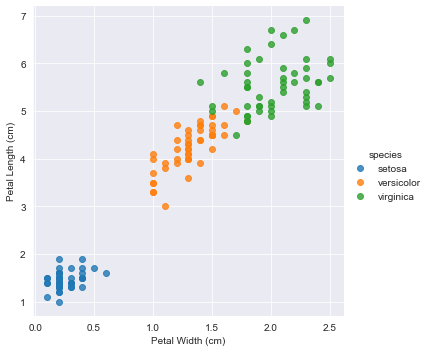

In [3]:
sns.lmplot(x='petal_width',y='petal_length',data=iris,hue='species',fit_reg=False)
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

<b>As can be seen, the flower types are clustered in regions that are distinctly separated from each other according to the petal width and height measurements. The k-nearest neighbor estimation method divides the area into three regions, and it is estimated that a flower whose newly arrived sizes are known but whose type is unknown enters in whichever area it enters.</b>

<b>In the scikit-learn module, fit() is used to classify a data set, and the KNeighborsClassifier function from the sklearn.neighbors module is used to predict which type of new data is.</b>

<b>First, the K value to be applied to this function is transferred with the n_neighbors argument and the result is assigned to a variable. Then the fit() method is applied to this variable (we can also say the classifier). Also, the data to which the fit() method will be applied should not have any spaces.</b>

In [4]:
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
nearest_k =KNeighborsClassifier(n_neighbors=5)
nearest_k.fit(iris.data,iris.target)

KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',
                     metric_params=None,n_jobs=1,p=2,weights='uniform')

KNeighborsClassifier(n_jobs=1)

In [5]:
flower_1 = np.array([[4.8,2.9,1.3,0.3]])
estimate = nearest_k.predict(flower_1)
estimate

array([0])

<b>As a result, we see an output in the KNeighborsClassifier class. Using this output, we can predict the type of flower whose values have just been measured.</b>

In [6]:
estimate_prob = nearest_k.predict_proba(flower_1)
estimate_prob

array([[1., 0., 0.]])

<b>Our classifier estimated that the newly measured flower was in the Setosa group, that is, 0. While making this estimation, we can see the probability of being in each type calculated using the predict_proba method. Our classifier estimates that the new flower is in the Setosa group with 100% probability.</b>

<b>Now, let's try the k nearest neighbor method using another dataset. As an example, we will use the Glass Identification data from the UCI Machine Learning Repository page. This dataset gives the glass type with the various element amounts in 214 pieces of glass. The glass type has values between 1 and 7. We will also create a KNN classifier that will group the glass class by element type.</b>

In [7]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
glass = pd.read_csv(url,sep=',',header=None)
glass.head()

0        1      2     3     4      5     6     7    8    9   10
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1

<b>In the next step, let's assign the observation number and RI (refractive index) data that make up the first two columns of the data set.</b>

In [8]:
glass.columns = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']
glass.drop(['Id','RI'],axis=1,inplace=True)
glass.head()

Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

<b>For simplicity, let's define the non-dependent variables as X and the dependent variables as y.</b>

In [9]:
X = glass.drop('Type',axis=1)
y = glass['Type']

<b>Finally, let's create the classifier</b>

In [10]:
nearest = KNeighborsClassifier(n_neighbors=6)
nearest.fit(X,y)
KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',
                     metric_params=None,n_jobs=1,p=2,n_neighbors=6,weights='uniform')

KNeighborsClassifier(n_jobs=1, n_neighbors=6)

In [11]:
estimate = nearest.predict(X)
estimate

array([1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 3, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 5,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 6, 6, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 3, 3, 1, 1, 2, 1, 3, 1,
       2, 1, 1, 1, 3, 3, 1, 3, 1, 2, 2, 5, 5, 5, 5, 5, 2, 5, 5, 2, 2, 5,
       6, 6, 6, 6, 7, 6, 2, 2, 7, 2, 2, 1, 2, 1, 6, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], dtype=int64)

<b>One of the ways to measure the performance of a model in my previous work is to divide the data we have into two as a learning and validation set, and we will use the train_test_split() function for the model as in my previous work. I explained the model arguments in my previous work.</b>

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=123,stratify=y)
X_train.head()

Na    Mg    Al     Si     K    Ca   Ba    Fe
98  12.67  2.88  1.71  73.21  0.73  8.54  0.0  0.00
75  13.02  3.58  1.51  73.12  0.69  7.96  0.0  0.00
89  12.55  3.48  1.87  73.23  0.63  8.08  0.0  0.09
68  13.12  3.58  0.90  72.20  0.23  9.82  0.0  0.16
55  12.45  2.71  1.29  73.70  0.56  9.06  0.0  0.24

In [13]:
y_train.head()

98    2
75    2
89    2
68    1
55    1
Name: Type, dtype: int64

<b>Now, let's do the operations we did before on the learning set.</b>

In [14]:
nearest = KNeighborsClassifier(n_neighbors=5)
nearest.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',
                     metric_params=None,n_jobs=1,p=2,n_neighbors=5,weights='uniform')

KNeighborsClassifier(n_jobs=1)

<b>Let's try the model we found in the validation set.</b>

In [15]:
estimate = nearest.predict(X_test)
estimate

array([2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 7, 2, 7, 1, 1,
       1, 1, 5, 1, 2, 7, 1, 3, 1, 1, 7, 5, 1, 2, 1, 7, 2, 1, 2, 2, 1],
      dtype=int64)

<b>We know the actual values corresponding to the validation set.</b>

In [16]:
np.array(y_test)

array([6, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 5, 7, 6, 1, 7, 2, 7, 1, 1,
       1, 3, 5, 1, 2, 7, 1, 1, 3, 2, 7, 5, 3, 2, 1, 7, 2, 1, 2, 2, 1],
      dtype=int64)

<b>Let's see the accuracy rate.</b>

In [17]:
nearest.score(X_test,y_test)

0.7209302325581395

<b>There is the GridSearchCV() function to find the K parameter that gives the best result for the model we are using.</b>

In [18]:
from sklearn.model_selection import GridSearchCV

#We are looking for the value K, i.e. n_neighbors, which will give the best result.
#Let's try all values between 1 and 30.
grid_params = {'n_neighbors':np.arange(1,30)}

nearest = KNeighborsClassifier()

#We pass the estimator and parameter array to the GridSearchCV function.
#We also need to determine the number of cross validations.
nearest_cv =GridSearchCV(nearest,grid_params,cv=5)

#We pass the X and y data to the GridSearchCV estimator we created.
nearest_cv.fit(X,y)

#We use the best_params_ property to find the parameter value that gives the best result.

nearest_cv.best_params_

{'n_neighbors': 1}

In [19]:
#We use the best_score_ feature to see the best result.
nearest_cv.best_score_

0.640531561461794

# 2) LOGISTICS REGRESSION

<b>Logistic regression is a method used for classification problems. Logistic regression is used in problems where the outcome is two probabilities. Let's consider problems where the variable we are predicting takes one of two different values.Examples such as whether or not the customer will buy a product, whether or not to view an ad.</b>

- <b>Mathematical expression of logistic regression :</b>

# $ln\left ( \frac{p\left ( x \right )}{1-p\left ( x \right )} \right ) = \hat{\beta _{0}} + \hat{\beta _{1}}X$

<b>Logistic Regression function is used in the sklearn.linear_model module for logistic regression. For this example, we will use the bank marketing dataset, which is among the 'UCI Machine Learning datasets'. In this dataset, 20 independent variables such as customer age, customer occupation, customer's marital status and There is a y column showing whether or not a deposit account has been opened.</b>

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

url = 'https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv'
bank =pd.read_csv(url,header=0)
bank.shape

(41188, 21)

In [21]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [22]:
bank = bank[['age','campaign','pdays','previous','emp_var_rate','cons_price_idx',
             'cons_conf_idx','euribor3m','nr_employed','y']]
bank.head()

age  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0   44         1    999         0           1.4          93.444   
1   53         1    999         0          -0.1          93.200   
2   28         3      6         2          -1.7          94.055   
3   39         2    999         0          -1.8          93.075   
4   55         1      3         1          -2.9          92.201   

   cons_conf_idx  euribor3m  nr_employed  y  
0          -36.1      4.963       5228.1  0  
1          -42.0      4.021       5195.8  0  
2          -39.8      0.729       4991.6  1  
3          -47.1      1.405       5099.1  0  
4          -31.4      0.869       5076.2  1

In [23]:
X = bank.drop('y',axis=1).values
y = bank['y']

X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.3,random_state=123)

loj_model = LogisticRegression()
loj_model.fit(X_train,y_train)
y_estimate = loj_model.predict(X_test)

confusion_matrix(y_test,y_estimate)

C:\ProgramData\Anaconda3\envs\batuhan\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[10850,   104],
       [ 1135,   268]], dtype=int64)

In [24]:
print(classification_report(y_test,y_estimate))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10954
           1       0.72      0.19      0.30      1403

    accuracy                           0.90     12357
   macro avg       0.81      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357

